In [1]:
import sys
sys.path

['d:\\Desktop\\QBM_project_repo\\quMCMC\\final_results_notebooks',
 'd:\\anaconda_neel\\python38.zip',
 'd:\\anaconda_neel\\DLLs',
 'd:\\anaconda_neel\\lib',
 'd:\\anaconda_neel',
 '',
 'd:\\anaconda_neel\\lib\\site-packages',
 'd:\\anaconda_neel\\lib\\site-packages\\locket-0.2.1-py3.8.egg',
 'd:\\anaconda_neel\\lib\\site-packages\\win32',
 'd:\\anaconda_neel\\lib\\site-packages\\win32\\lib',
 'd:\\anaconda_neel\\lib\\site-packages\\Pythonwin',
 'd:\\anaconda_neel\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\NEELKANTH RAWAT\\.ipython']

In [2]:
sys.path.append("d:/Desktop/QBM_project_repo/quMCMC")  # Adjust the path as necessary #this is a bit strange isn't it?

In [3]:
import qumcmc

In [4]:
## import essential modules 
from qumcmc.basic_utils import *
from qumcmc.energy_models import IsingEnergyFunction, Exact_Sampling

from qumcmc.classical_mcmc_routines import classical_mcmc
from qumcmc.quantum_mcmc_routines_qulacs import quantum_enhanced_mcmc     #for Qulacs Simulator backend (** Faster )
from qumcmc.quantum_mcmc_qulacs_2 import quantum_enhanced_mcmc_2
# from qumcmc.quantum_mcmc_routines_qiskit import quantum_enhanced_mcmc   #for qiskit Aer's Simulator backend 

from qumcmc.trajectory_processing import calculate_running_js_divergence, calculate_running_kl_divergence, calculate_runnning_magnetisation, get_trajectory_statistics
from qumcmc.prob_dist import DiscreteProbabilityDistribution

### Loading the Bars dataset

In [5]:
gridsize=3

bas= bas_dataset(grid_size=gridsize)
bas.dataset.sort()

In [6]:
# consider only the bars dataset and create the weight matrix for them and create the ising model
wt = hebbing_learning(bas.bas_dict["bars"])
n_spins=gridsize*gridsize
shape_of_J=(n_spins,n_spins)
J=-1*wt
h=np.zeros(n_spins)
model=IsingEnergyFunction(J,h,name=f'ising model BAS {n_spins}X{n_spins} bars only')


            MODEL : ising model BAS 9X9 bars only
Non-zero Interactions (J) : 36 / 36
Non-zero Bias (h) : 0 / 9
---------------------------------------------
Average Interaction Strength <|J|> :  2.6666666666666665
Average Bias Strength <|h|>:  0.0
alpha :  0.14433756729740643
---------------------------------------------


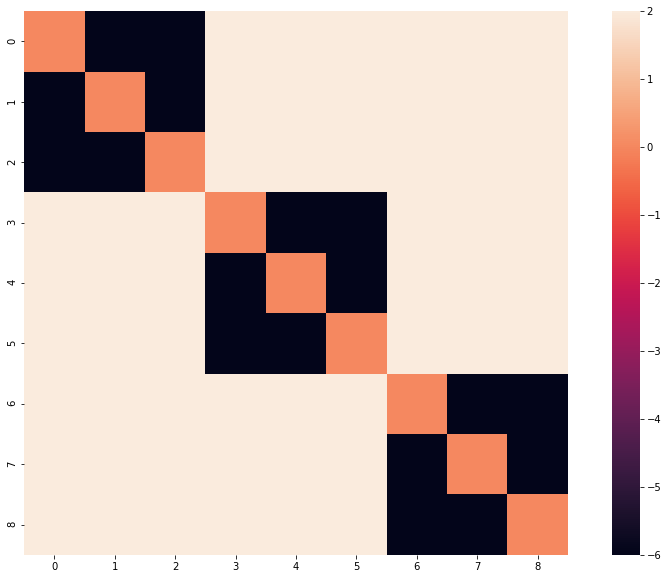

In [7]:
model.model_summary()

     MODEL : ising model BAS 9X9 bars only |  beta : 1.5
Num Most Probable States : 6
Entropy : 2.5849625007211547
---------------------------------------------


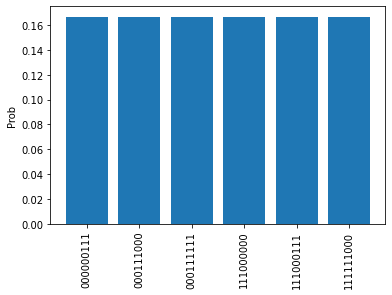

In [8]:
# model.model_summary()
beta=1.5
## run exact sampling over all possible configurations 
exact_sampled_model = Exact_Sampling(model, beta)

## get distribution from the model
bpd= DiscreteProbabilityDistribution(exact_sampled_model.boltzmann_pd)
exact_sampled_model.sampling_summary()

note : we will work with quantum_enhanced_mcmc_2 coz there we have a provision of seperate mixer and system hamiltonian

In [9]:
# ### this is not a very elegant way of writing things up. need to improve it!
# mixers_to_test={'qu-wt1': {'mcmc_type': 'quantum-enhanced', 'mixer': [[['random', 1]], []]},
#  'qu-wt2': {'mcmc_type': 'quantum-enhanced', 'mixer': [[['random', 2]], []]},
#  'qu-wt3': {'mcmc_type': 'quantum-enhanced', 'mixer': [[['random', 3]], []]},
#  'qu-alt-wt1-wt3': {'mcmc_type': 'quantum-enhanced',
#                     'mixer': [[['random', 3], ['random', 1]], [0.5, 0.5]]},
#   } 

# classical_mcmc_test={'cl-uniform': {'mcmc_type': 'classical', 'mixer': [[['uniform']], []]},
#  'cl-local-wt1': {'mcmc_type': 'classical', 'mixer': [[['local', 1]], []]},
#  'cl-local-wt3': {'mcmc_type': 'classical', 'mixer': [[['local', 3]], []]},
#  'cl-alt-wt1-wt3': {'mcmc_type': 'classical',
#                     'mixer': [[['local', 3], ['local', 1]], [0.5, 0.5]]  
#     }
# }

In [10]:
# from qumcmc.quantum_mcmc_qulacs_2 import fn_qckt_problem_half, fn_qckt_X_mixer

In [11]:
# checking_fn_qckt_mixer_terms= fn_qckt_X_mixer(num_spins=n_spins,gamma=0.4,
#                                               delta_time=0.8,
#                                               mixer_type=["random", 2])

* Rajarsi in his previous code considered gamma range to be (0.999,1.0). let's collect the result corresponding to the gamma authors have considered in their original paper.

In [9]:
# initial_state_for_mcmc=bpd.get_sample(1)[0]
# print(initial_state_for_mcmc)
initial_state_for_mcmc='111000111'

In [10]:
import pickle

In [11]:
### testing qumcmc run 
num_chains=1
steps=50000

In [12]:
gamma_range_list=[(0.4,0.6)]#[(0.2,0.4),(0.4,0.6),(0.6,0.8)]

In [14]:
mcmc_1= quantum_enhanced_mcmc_2(n_hops=steps,
                                            model=model,
                                            initial_state= initial_state_for_mcmc,
                                            mixer= [[['random', 1]], []]# add something here,
                                            , gamma_range=(0.4,0.6),verbose=True)

filename_mcmc_1_bars="mcmc_wt1_bars_only.pkl"
with open(filename_mcmc_1_bars, "wb") as file:
    pickle.dump(mcmc_1, file)

runnning quantum MCMC steps . ..:   0%|          | 9/50000 [00:00<09:49, 84.77it/s]

starting with:  111000111 with energy: -72.0


runnning quantum MCMC steps . ..: 100%|██████████| 50000/50000 [06:32<00:00, 127.32it/s]


In [15]:
steps=50000
mcmc_2=quantum_enhanced_mcmc_2(n_hops=steps,
                                            model=model,
                                            initial_state= initial_state_for_mcmc,
                                            mixer= [[['custom', [[0, 1, 2], [3, 4, 5], [6, 7, 8]]]], []]
                                            , gamma_range= (0.4,0.6)
                                            , verbose=True)

filename_mcmc_2_bars="mcmc_highly_symmetric_bars_only.pkl"
with open(filename_mcmc_2_bars, "wb") as file:
    pickle.dump(mcmc_2, file)

runnning quantum MCMC steps . ..:   0%|          | 13/50000 [00:00<06:38, 125.28it/s]

starting with:  111000111 with energy: -72.0


runnning quantum MCMC steps . ..: 100%|██████████| 50000/50000 [06:08<00:00, 135.76it/s]


In [16]:
mcmc_3=quantum_enhanced_mcmc_2(n_hops=steps,
                                            model=model,
                                            initial_state= initial_state_for_mcmc,
                                            mixer= [[['random', 3]], []]# add something here,
                                            ,gamma_range=(0.4,0.6)
                                            , verbose=True) 

filename_mcmc_3_bars="mcmc_wt3_bars_only.pkl"
with open(filename_mcmc_3_bars, "wb") as file:
    pickle.dump(mcmc_3, file)

runnning quantum MCMC steps . ..:   0%|          | 4/50000 [00:00<31:45, 26.23it/s]

starting with:  111000111 with energy: -72.0


runnning quantum MCMC steps . ..: 100%|██████████| 50000/50000 [19:28<00:00, 42.79it/s]


In [ ]:
# mcmc_chain_example.states[0], mcmc_chain_example.states, mcmc_chain_example.get_accepted_dict()

In [12]:
def calculate_hamming_distance(str1, str2):
    """Calculate the Hamming distance between two bitstrings."""
    return sum(c1 != c2 for c1, c2 in zip(str1, str2))

def generate_hamming_distances_dict(initial_state: str, mcmc_states):
    """Generate a dictionary with keys as Hamming distances between current_state 
    (initialized with initial_state) and proposed states."""
    hamming_distances_dict = {}

    # Calculate the length of the initial bitstring
    bitstring_length = len(initial_state)

    # Initialize dictionary with all possible Hamming distances
    for i in range(bitstring_length + 1):
        hamming_distances_dict[i] = 0

    current_state = initial_state

    for state in mcmc_states:
        proposed_state = state.bitstring
        distance = calculate_hamming_distance(current_state, proposed_state)

        if state.accepted:
            current_state = proposed_state

        # Increment the count for the corresponding Hamming distance
        hamming_distances_dict[distance] += 1

    return hamming_distances_dict

In [15]:
def plot_bar_graph(data_dict, label):
    """Plot a bar graph using the given dictionary."""
    # Check if values are normalized, if not, normalize them
    total = sum(data_dict.values())
    if total != 1:  # Not normalized
        data_dict = {k: v / total for k, v in data_dict.items()}

    # Plotting
    # plt.yscale("log")
    plt.plot(data_dict.keys(), data_dict.values(),"-*", label=label)
    plt.xlabel('Hamming Distance b/w current state and proposed state')
    plt.ylabel('Empirical Proposal Probability')
    plt.title('Hamming Distance Distribution')
    #plt.show()

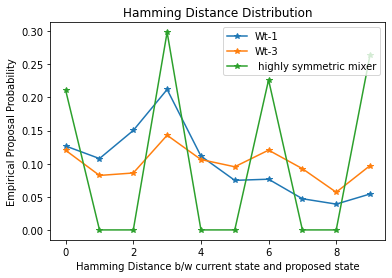

In [160]:
### within normal gamma range of (0.2,0.6)
hamming_1 = generate_hamming_distances_dict(initial_state_for_mcmc, 
                                                         mcmc_states=mcmc_1.states)
hamming_2= generate_hamming_distances_dict(initial_state_for_mcmc, 
                                                         mcmc_states=mcmc_2.states)

hamming_3= generate_hamming_distances_dict(initial_state_for_mcmc, 
                                                         mcmc_states=mcmc_3.states)
# print(hamming_distances_dict)
# plt.yscale("log")
plot_bar_graph(hamming_1, label="Wt-1")
plot_bar_graph(hamming_3, label= "Wt-3")
plot_bar_graph(hamming_2, label=" highly symmetric mixer")#"Wt-2 (0.2-0.3)")


plt.legend()                                  
plt.show() 

50001it [00:02, 17444.18it/s]
50001it [00:02, 17732.47it/s]
50001it [00:02, 20066.64it/s]


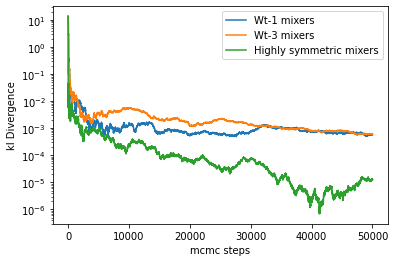

In [161]:
### Running KL divergence
kl_1= calculate_running_kl_divergence(actual_boltz_distn=bpd,
                                mcmc_chain=mcmc_1, verbose=True)

kl_2=calculate_running_kl_divergence(actual_boltz_distn=bpd,
                                mcmc_chain=mcmc_2, verbose=True)

kl_3=calculate_running_kl_divergence(actual_boltz_distn=bpd,
                                mcmc_chain=mcmc_3, verbose=True)

plt.yscale("log")
plt.plot(kl_1, label="Wt-1 mixers")
# 
plt.plot(kl_3, label="Wt-3 mixers")
plt.plot(kl_2, label="Highly symmetric mixers")#"Wt-2")
plt.ylabel("kl Divergence")
plt.xlabel("mcmc steps")
plt.legend()
plt.show()

In [29]:
### save the mcmc chain
type(mcmc_1)

qumcmc.basic_utils.MCMCChain

### let's consider the case for the entire bars and stripes dataset

In [6]:
gridsize=3

bas= bas_dataset(grid_size=gridsize)
bas.dataset.sort()

In [7]:
# consider only the bars dataset and create the weight matrix for them and create the ising model
wt_2 = hebbing_learning(bas.bas_dict["bars"]+ bas.bas_dict["stripes"])## added 2 datapoints from stripes dataset into it
n_spins=gridsize*gridsize
shape_of_J=(n_spins,n_spins)
J_2=-1*wt_2
h_2=np.zeros(n_spins)
model_2=IsingEnergyFunction(J_2,h_2,name=f'ising model BAS {n_spins}X{n_spins} bars + stripes')


In [118]:
bas.bas_dict["stripes"] # a potential symmetry here is: [(X3,X6,X9),(X2,X5,X8),(X1,X4,X7)] # let's see if this works well or not

['001001001', '010010010', '100100100', '011011011', '101101101', '110110110']

     MODEL : ising model BAS 9X9 bars + stripes |  beta : 1.5
Num Most Probable States : 12
Entropy : 3.5849625001146053
---------------------------------------------


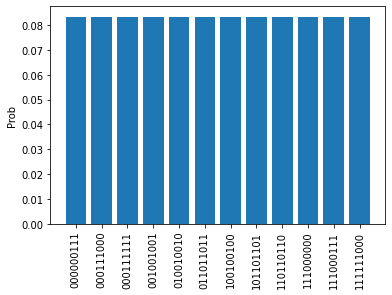

In [8]:
# model.model_summary()
beta=1.5
## run exact sampling over all possible configurations 
exact_sampled_model_2 = Exact_Sampling(model_2, beta)

## get distribution from the model
bpd_2= DiscreteProbabilityDistribution(exact_sampled_model_2.boltzmann_pd)
exact_sampled_model_2.sampling_summary()

In [24]:
### let's work with the same initial state

initial_state_for_mcmc='111000111'
num_chains=1
steps =10000 # let's run small number of runs
gamma_range=(0.4,0.6)

### run the mcmc chain, let's consider the 1. vanilla mixer 2. Wt-3 mixer 
### and 3. alternating vanilla mixer and Wt-3 mixer (I'll test this later)

mcmc2_1=quantum_enhanced_mcmc_2(n_hops=steps,
                                            model=model_2,
                                            initial_state= initial_state_for_mcmc,
                                            mixer= [[['random', 1]], []]# add something here,
                                            ,gamma_range=gamma_range ,verbose=True)

mcmc2_4=quantum_enhanced_mcmc_2(n_hops=steps,
                                            model=model_2,
                                            initial_state= initial_state_for_mcmc,
                                            mixer=  [[['random', 1], ['custom', 
                                                                    [[0, 1, 2], [3, 4, 5], [6, 7, 8]]]],
                                                                    [0.75, 0.25]]# add something here,
                                            ,gamma_range=(0.9,0.95)
                                            , verbose=True)

mcmc2_5=quantum_enhanced_mcmc_2(n_hops=steps,
                                            model=model_2,
                                            initial_state= initial_state_for_mcmc,
                                            mixer=  [[
                                                ['custom',[[2, 5, 8], [1, 4, 7], [0, 3, 6]] ], #stripes: [(X2,X5,X8),(X1,X4,X7),(X0,X3,X6)]
                                                ['custom', [[0, 1, 2], [3, 4, 5], [6, 7, 8]]],
                                                ['random', 1]
                                                ],
                                                [0.25,0.25,0.50]]# add something here,
                                            ,gamma_range=(0.9,0.95)
                                            , verbose=True)

runnning quantum MCMC steps . ..:   0%|          | 10/10000 [00:00<01:49, 91.00it/s]

starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 10/10000 [00:00<01:55, 86.74it/s]

starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 13/10000 [00:00<01:28, 113.19it/s]

starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..: 100%|██████████| 10000/10000 [01:15<00:00, 132.90it/s]


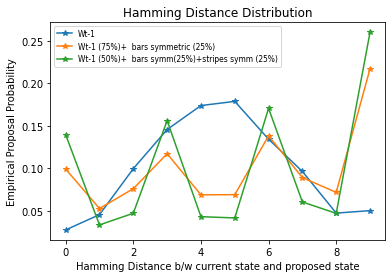

In [16]:
# Load data from mcmc_wt1_bars_only.pkl
import pickle
f = "BAS_final_plots_Wt1_gamma_(0.4,0.6).pkl "
with open(f, "rb") as file:
    mcmc_BAS_10_wt1 = pickle.load(file)

f = "BAS_final_plots_wt1_75_symmetric_25_gamma_(0.9,0.95).pkl "
with open(f, "rb") as file:
    mcmc_BAS_10_custom1 = pickle.load(file)

f = "BAS_final_plots_wt1_50_bars_and_stripes_symm_50_gamma_(0.9,0.95).pkl "
with open(f, "rb") as file:
    mcmc_BAS_10_custom2 = pickle.load(file)

initial_state_for_mcmc="111000111"
hamming2_1 = generate_hamming_distances_dict(initial_state_for_mcmc, 
                                                         mcmc_states=mcmc_BAS_10_wt1[2].states)
# hamming2_2= generate_hamming_distances_dict(initial_state_for_mcmc, 
#                                                          mcmc_states=mcmc2_2.states)
# hamming2_3= generate_hamming_distances_dict(initial_state_for_mcmc, 
#                                                          mcmc_states=mcmc2_3.states)
hamming2_4 = generate_hamming_distances_dict(initial_state_for_mcmc, 
                                                         mcmc_states=mcmc_BAS_10_custom1[2].states)
hamming2_5 = generate_hamming_distances_dict(initial_state_for_mcmc, 
                                                         mcmc_states=mcmc_BAS_10_custom2[2].states)

# print(hamming_distances_dict)
# plt.yscale("log")
plot_bar_graph(hamming2_1, label="Wt-1")
# # plot_bar_graph(hamming_2, label="Wt-2")
# plot_bar_graph(hamming2_2, label= "Wt-3")
# plot_bar_graph(hamming2_3, label= "Wt-1 (60%) +  Wt-3(40%)") 
plot_bar_graph(hamming2_4, label= "Wt-1 (75%)+  bars symmetric (25%)") 
plot_bar_graph(hamming2_5, label= "Wt-1 (50%)+  bars symm(25%)+stripes symm (25%)") 
plt.legend(fontsize=7.5)
plt.show()

In [ ]:
hamming2_1 = generate_hamming_distances_dict(initial_state_for_mcmc, 
                                                         mcmc_states=mcmc2_1.states)
# hamming2_2= generate_hamming_distances_dict(initial_state_for_mcmc, 
#                                                          mcmc_states=mcmc2_2.states)
# hamming2_3= generate_hamming_distances_dict(initial_state_for_mcmc, 
#                                                          mcmc_states=mcmc2_3.states)
hamming2_4 = generate_hamming_distances_dict(initial_state_for_mcmc, 
                                                         mcmc_states=mcmc2_4.states)
hamming2_5 = generate_hamming_distances_dict(initial_state_for_mcmc, 
                                                         mcmc_states=mcmc2_5.states)

# print(hamming_distances_dict)
# plt.yscale("log")
plot_bar_graph(hamming2_1, label="Wt-1")
# # plot_bar_graph(hamming_2, label="Wt-2")
# plot_bar_graph(hamming2_2, label= "Wt-3")
# plot_bar_graph(hamming2_3, label= "Wt-1 (60%) +  Wt-3(40%)") 
plot_bar_graph(hamming2_4, label= "Wt-1 (75%)+  bars symmetric (25%)") 
plot_bar_graph(hamming2_5, label= "Wt-1 (50%)+  bars symm(25%)+stripes symm (25%)") 
plt.legend(fontsize=7.5)
plt.show()

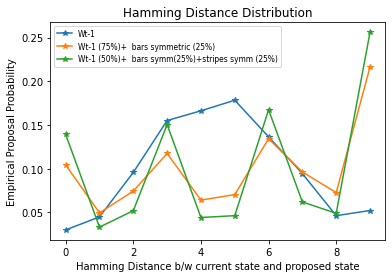

In [25]:
hamming2_1 = generate_hamming_distances_dict(initial_state_for_mcmc, 
                                                         mcmc_states=mcmc2_1.states)
# hamming2_2= generate_hamming_distances_dict(initial_state_for_mcmc, 
#                                                          mcmc_states=mcmc2_2.states)
# hamming2_3= generate_hamming_distances_dict(initial_state_for_mcmc, 
#                                                          mcmc_states=mcmc2_3.states)
hamming2_4 = generate_hamming_distances_dict(initial_state_for_mcmc, 
                                                         mcmc_states=mcmc2_4.states)
hamming2_5 = generate_hamming_distances_dict(initial_state_for_mcmc, 
                                                         mcmc_states=mcmc2_5.states)

# print(hamming_distances_dict)
# plt.yscale("log")
plot_bar_graph(hamming2_1, label="Wt-1")
# # plot_bar_graph(hamming_2, label="Wt-2")
# plot_bar_graph(hamming2_2, label= "Wt-3")
# plot_bar_graph(hamming2_3, label= "Wt-1 (60%) +  Wt-3(40%)") 
plot_bar_graph(hamming2_4, label= "Wt-1 (75%)+  bars symmetric (25%)") 
plot_bar_graph(hamming2_5, label= "Wt-1 (50%)+  bars symm(25%)+stripes symm (25%)") 
plt.legend(fontsize=7.5)
plt.show()

In [181]:
### save the mcmc chain for the BAS dataset.
# import pickle

# filename_mcmc_1_bas="mcmc_wt1_BAS.pkl"
# with open(filename_mcmc_1_bas, "wb") as file:
#     pickle.dump(mcmc2_1, file)

# filename_mcmc_2_bas="mcmc_wt3_BAS.pkl"
# with open(filename_mcmc_2_bas, "wb") as file:
#     pickle.dump(mcmc2_2, file)


# filename_mcmc_3_bas="mcmc_wt1_w3_60_40_BAS.pkl"
# with open(filename_mcmc_3_bas, "wb") as file:
#     pickle.dump(mcmc2_3, file)

# filename_mcmc_4_bas="mcmc_wt1_custom_75_25_BAS.pkl"
# with open(filename_mcmc_4_bas, "wb") as file:
#     pickle.dump(mcmc2_4, file)

# filename_mcmc_5_bas="mcmc_wt1_custom_25_75_BAS.pkl"
# with open(filename_mcmc_5_bas, "wb") as file:
#     pickle.dump(mcmc2_5, file)




In [137]:
# import pickle

# filename_mcmc2_1_bars="mcmc2_wt1_bas.pkl"
# with open(filename_mcmc2_1_bars, "wb") as file:
#     pickle.dump(mcmc2_1, file)

# filename_mcmc2_2_bars="mcmc2_wt3_bas.pkl"
# with open(filename_mcmc2_2_bars, "wb") as file:
#     pickle.dump(mcmc2_2, file)


# filename_mcmc2_3_bars="mcmc2_wt1_and_wt3_bas.pkl"
# with open(filename_mcmc2_3_bars, "wb") as file:
#     pickle.dump(mcmc2_3, file)

In [ ]:
# ### within normal gamma range of (0.2,0.6)
# hamming2_1 = generate_hamming_distances_dict(initial_state_for_mcmc, 
#                                                          mcmc_states=mcmc2_1.states)
# # hamming2_2= generate_hamming_distances_dict(initial_state_for_mcmc, 
# #                                                          mcmc_states=mcmc2_2.states)
# # hamming2_3= generate_hamming_distances_dict(initial_state_for_mcmc, 
# #                                                          mcmc_states=mcmc2_3.states)
# hamming2_4 = generate_hamming_distances_dict(initial_state_for_mcmc, 
#                                                          mcmc_states=mcmc2_4.states)
# hamming2_5 = generate_hamming_distances_dict(initial_state_for_mcmc, 
#                                                          mcmc_states=mcmc2_5.states)

# # print(hamming_distances_dict)
# plt.yscale("log")
# plot_bar_graph(hamming2_1, label="Wt-1")
# # # plot_bar_graph(hamming_2, label="Wt-2")
# # plot_bar_graph(hamming2_2, label= "Wt-3")
# # plot_bar_graph(hamming2_3, label= "Wt-1 (60%) +  Wt-3(40%)") 
# plot_bar_graph(hamming2_4, label= "Wt-1 (75%)+  Highly symmetric (25%)") 
# plot_bar_graph(hamming2_5, label= "Wt-1 (40%)+  bars symm(30%)+stripes symm (30%)") 
# plt.legend()
# plt.show()

10001it [00:00, 17471.13it/s]
10001it [00:00, 16068.07it/s]
10001it [00:00, 14856.72it/s]


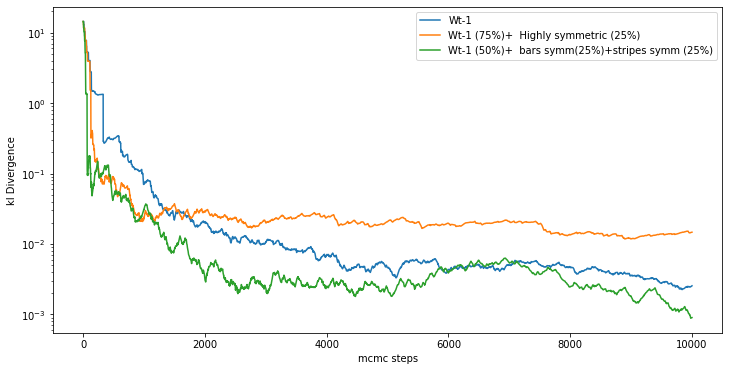

In [22]:
### Running KL divergence
kl2_1= calculate_running_kl_divergence(actual_boltz_distn=bpd_2,
                                mcmc_chain=mcmc2_1, verbose=True)

# kl2_2=calculate_running_kl_divergence(actual_boltz_distn=bpd_2,
#                                 mcmc_chain=mcmc2_2, verbose=True)

# kl2_3=calculate_running_kl_divergence(actual_boltz_distn=bpd_2,
#                                 mcmc_chain=mcmc2_3, verbose=True)

kl2_4=calculate_running_kl_divergence(actual_boltz_distn=bpd_2,
                                mcmc_chain=mcmc2_4, verbose=True)

kl2_5=calculate_running_kl_divergence(actual_boltz_distn=bpd_2,
                                mcmc_chain=mcmc2_5, verbose=True)

plt.figure(figsize=(12,6))
plt.yscale("log")
plt.plot(kl2_1, label="Wt-1")
# plt.plot(kl2_2, label="Wt-3")
# plt.plot(kl2_3, label= "Wt-1 (60%) + Wt-3 (40%)")
plt.plot(kl2_4, label= "Wt-1 (75%)+  Highly symmetric (25%)")
plt.plot(kl2_5, label= "Wt-1 (50%)+  bars symm(25%)+stripes symm (25%)")
plt.ylabel("kl Divergence")
plt.xlabel("mcmc steps")
plt.legend()
plt.show()

In [140]:
### from the get_trajectory_statistics


In [141]:
### manuel's code
# fig, axes = plt.subplots(1, 3, figsize=(15,4))
# (ax1, ax2, ax3) = axes

# ax1.plot(np.arange(gridsize**2+1), [r["total"]/steps for r in r["hamming"].values()], marker="o", label="With System H")
# ax1.plot(np.arange(gridsize**2+1), [r["total"]/steps for r in rm["hamming"].values()], marker="o", label="Mismatched H")
# ax1.plot(np.arange(gridsize**2+1), [r["total"]/steps for r in rz["hamming"].values()], marker="o", label="Without System H", color="grey")
# ax1.set_yscale("log")
# ax1.set_ylabel("Proposal Probability")
# ax1.set_xlabel("Hamming Distance")
# ax1.legend()

# ax2.bar(np.arange(gridsize**2+1)-0.8, [r["accepted"]/r["total"] if r["total"] >0 else 0 for r in hams.values() ], label="With System H")
# ax2.bar(np.arange(gridsize**2+1)-0.0, [r["accepted"]/r["total"] if r["total"] >0 else 0 for r in hams_miss.values() ], label="Mismatched H")
# ax2.bar(np.arange(gridsize**2+1)+0.8, [r["accepted"]/r["total"] if r["total"] >0 else 0 for r in hams_zero.values() ], label="Without System H", color="grey")
# # plt.yscale("log")
# ax2.set_ylabel("Aceptance Probability")
# ax2.set_xlabel("Hamming Distance")
# ax2.set_xticks([0, 3, 6, 9])
# ax2.legend()

# ax3.plot(r["kldiv"], label="With System H")
# ax3.plot(rm["kldiv"], label="Mismatched H")
# ax3.plot(rz["kldiv"], label="Without System H", color="grey")
# plt.yscale("log")
# ax3.set_ylabel("KL Divergence")
# ax3.set_xlabel("MCMC Iteration")
# ax3.legend(loc="upper right")

### Checking Rajarsi's dataset

In [142]:
# import pickle

# localpath="D:\Desktop\QBM_project_repo\quMCMC\BAS3-MIXER_SETTINGS.pkl"
# #name = 'BAS3-MIXER_SETTINGS.pkl'
# with open(localpath, 'rb') as f :
#     MIXER_SETTINGS = pickle.load(f)

In [143]:
# MIXER_SETTINGS

In [144]:
# experiment1_filename = "D:\Desktop\QBM_project_repo\quMCMC\SamplingData\BAS3\MIXINGDATA_BAS3_1.pkl"
# #'SamplingData/BAS3/MIXINGDATA_BAS3_1.pkl'

# with open(experiment1_filename, 'rb') as f: MIXINGDATA = pickle.load(f)

In [145]:
# MIXINGDATA

In [146]:
### let's obtain the info about the hamming distances and see how it goes

# mcmc_settings_to_experiment = ['qu-wt1', 'qu-wt2', 'qu-wt3']#, 'qu-alt-wt1-wt3']#, 'qu-stabilizers-wt3']

# ### generate list of hamming_distance_dict
# list_hamming_dict=[]
# for i in range(0,len(mcmc_settings_to_experiment)):
#     mcmc_chain=MIXINGDATA[9][mcmc_settings_to_experiment[i]]
#     hamming_distances_dict = generate_hamming_distances_dict(initial_state_for_mcmc, 
#                                                             mcmc_states=mcmc_chain.states)
#     list_hamming_dict.append(hamming_distances_dict)

# ### Plotting the proposal probability's information for the case when gamma= (0.999,1)
# plt.figure(figsize=(12,6))
# for i in range(0,len(mcmc_settings_to_experiment)):
#     plot_bar_graph(list_hamming_dict[i], label=mcmc_settings_to_experiment[i])


# plt.legend()
# plt.show()